In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/flight_price_test.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

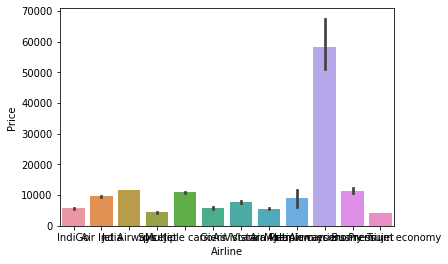

In [ ]:
import seaborn as sns
sns.barplot(x=df['Airline'],y=df['Price'],data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


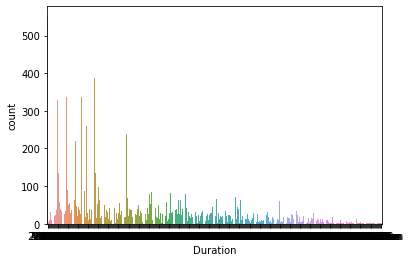

In [ ]:
sns.countplot(df['Duration'],data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


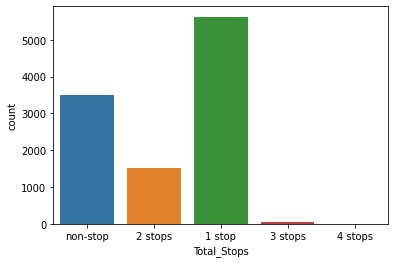

In [ ]:
sns.countplot(df['Total_Stops'],data=df)

In [ ]:
x=df['Duration']
x

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [ ]:
x=x.str.replace('h','')
x=x.str.replace('m','')

In [ ]:
y=[]
for i in x:
  k=i.split(' ')
  y.append(k)
y



[['2', '50'],
 ['7', '25'],
 ['19'],
 ['5', '25'],
 ['4', '45'],
 ['2', '25'],
 ['15', '30'],
 ['21', '5'],
 ['25', '30'],
 ['7', '50'],
 ['13', '15'],
 ['2', '35'],
 ['2', '15'],
 ['12', '10'],
 ['2', '35'],
 ['26', '35'],
 ['4', '30'],
 ['22', '35'],
 ['23'],
 ['20', '35'],
 ['5', '10'],
 ['15', '20'],
 ['2', '50'],
 ['2', '55'],
 ['13', '20'],
 ['15', '10'],
 ['5', '45'],
 ['5', '55'],
 ['2', '50'],
 ['2', '15'],
 ['2', '15'],
 ['13', '25'],
 ['2', '50'],
 ['22'],
 ['5', '30'],
 ['10', '25'],
 ['5', '15'],
 ['2', '30'],
 ['6', '15'],
 ['11', '55'],
 ['11', '5'],
 ['8', '30'],
 ['22', '5'],
 ['2', '45'],
 ['12'],
 ['2', '50'],
 ['2', '50'],
 ['2', '15'],
 ['16', '5'],
 ['19', '55'],
 ['3', '15'],
 ['25', '20'],
 ['2', '50'],
 ['3'],
 ['2', '50'],
 ['16', '15'],
 ['15', '5'],
 ['2', '15'],
 ['6', '30'],
 ['25', '5'],
 ['12', '25'],
 ['27', '20'],
 ['10', '15'],
 ['10', '30'],
 ['2', '15'],
 ['10', '25'],
 ['2', '50'],
 ['1', '30'],
 ['13', '20'],
 ['2', '15'],
 ['1', '25'],
 ['26', '3

In [ ]:
z=pd.DataFrame(y)
z.columns=['d_hour','d_minute']
z

,d_hour,d_minute
0,2,50
1,7,25
2,19,None
3,5,25
4,4,45
...,...,...
10678,2,30
10679,2,35
10680,3,None
10681,2,40


In [ ]:
df['d_hour']=z.iloc[:,0]
df['d_minute']=z.iloc[:,1]
df['d_minute']=df['d_minute'].fillna(df['d_minute'].mode() [0])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,d_hour,d_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,30
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,3,30
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2,40


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
d_hour             0
d_minute           0
dtype: int64

In [ ]:
df['d_hour'] = df['d_hour'].astype(int)


In [ ]:
df['Route']=df['Route'].fillna(df['Route'].mode() [0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode() [0])

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
d_hour             0
d_minute           0
dtype: int64

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'd_hour', 'd_minute'],
      dtype='object')

In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
d_hour              int64
d_minute           object
dtype: object

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,d_hour,d_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-29 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-29 05:50:00,2023-01-29 13:15:00,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-29 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,19,30


In [ ]:
df['journey_moth']=df['Date_of_Journey'].dt.month
df['journey_day']=df['Date_of_Journey'].dt.day
df['Dep_Time_min']=df['Dep_Time'].dt.minute
df['Dep_Time_hour']=df['Dep_Time'].dt.hour
df['Arrival_Time_min']=df['Arrival_Time'].dt.minute
df['Arrival_Time_hour']=df['Arrival_Time'].dt.hour
df.drop(['Date_of_Journey'],axis=1,inplace=True)


In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,d_hour,d_minute,journey_moth,journey_day,Dep_Time_min,Dep_Time_hour,Arrival_Time_min,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-29 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,2,50,3,24,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-29 05:50:00,2023-01-29 13:15:00,7h 25m,2 stops,No info,7662,7,25,1,5,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-29 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,19,30,9,6,25,9,25,4


In [ ]:

df.drop(['Dep_Time',],axis=1,inplace=True)


In [ ]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
df.drop(['Duration'],axis=1,inplace=True)

In [ ]:
df.drop(['d_minute'],axis=1,inplace=True)

In [ ]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,d_hour,journey_moth,journey_day,Dep_Time_min,Dep_Time_hour,Arrival_Time_min,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,3,24,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,1,5,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,9,6,25,9,25,4


In [ ]:
dummy=pd.get_dummies(df[['Airline','Source','Destination','Route','Total_Stops']],drop_first=True)
dummy

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,d_hour,journey_moth,journey_day,...,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,3,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,1,5,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,9,6,...,0,0,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,2,9,4,...,0,0,0,0,0,0,0,0,0,1
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,2,4,27,...,0,0,0,0,0,0,0,0,0,1
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,3,4,27,...,0,0,0,0,0,0,0,0,0,1
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,2,1,3,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe1=dfe.drop(['Airline','Source','Destination','Route','Total_Stops'],axis=1)

In [ ]:
dfe1.isna().sum()

Additional_Info         0
Price                   0
d_hour                  0
journey_moth            0
journey_day             0
                       ..
Route_MAA → CCU         0
Total_Stops_2 stops     0
Total_Stops_3 stops     0
Total_Stops_4 stops     0
Total_Stops_non-stop    0
Length: 160, dtype: int64

In [ ]:
dfe1.drop(['Additional_Info'],axis=1,inplace=True)

In [ ]:
dfe1.dtypes

Price                   int64
d_hour                  int64
journey_moth            int64
journey_day             int64
Dep_Time_min            int64
                        ...  
Route_MAA → CCU         uint8
Total_Stops_2 stops     uint8
Total_Stops_3 stops     uint8
Total_Stops_4 stops     uint8
Total_Stops_non-stop    uint8
Length: 159, dtype: object

In [ ]:
y=dfe1['Price']

In [ ]:
x=dfe1.drop(['Price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9564729342351878
Predictions are: [13704.8175      6414.63       13193.615      ...  5733.47
  3307.54       10156.98166667]


r2 score is: 0.7966143021332319
MAE:1149.3578019178863
MSE:4108071.3991742306
RMSE:2026.837783142556


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


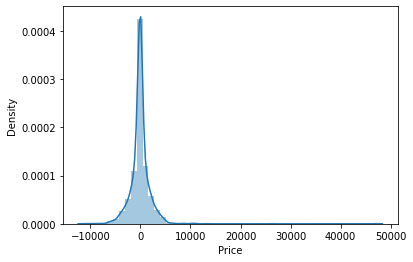

In [ ]:
predict(RandomForestRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.974098966962426
Predictions are: [14781.  5883. 14781. ...  6015.  3100.  9663.]


r2 score is: 0.7250124127865761
MAE:1293.4847633905358
MSE:5554317.014460911
RMSE:2356.7598550681637


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


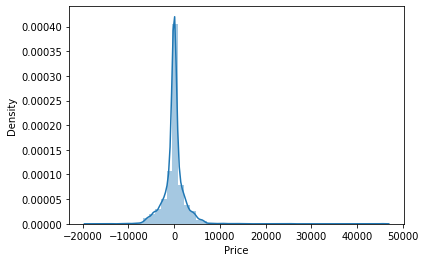

In [ ]:
predict(DecisionTreeRegressor())

Model is: LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.27761433538379243
Predictions are: [10844  7038 14781 ...  6216  3100 10844]


r2 score is: 0.34830702123514057
MAE:2214.343213728549
MSE:13163173.788455538
RMSE:3628.1088446262934


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


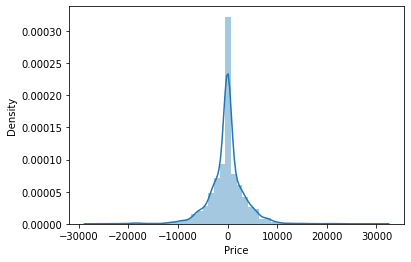

In [ ]:
predict(LogisticRegression())